In [1]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
 
application_df = pd.read_csv("/Users/mariacastellanos/Desktop/Analytics_Bootcamp/Neural_Network_Charity_Analysis/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# drop the non-beneficial ID columns
application_df = application_df.drop(["EIN", "STATUS"],1)

In [3]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                   1260
TOPS CLUB INC                                             765
UNITED STATES BOWLING CONGRESS INC                        700
WASHINGTON STATE UNIVERSITY                               492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC           408
                                                         ... 
GID                                                         1
WAT WIMUTTAYARAM BUDDHIST TEMPLE OF LOUISIANA INC           1
COLORADO AVIATION BUSINESS ASSOCIATION FOUNDATION           1
KAPPA ALPHA PSI-MACON WARNER ALUMNI CHAPTER                 1
MUJERES POR LA JUSTICIA EDUCACION Y EL RECONOCIMIENTO       1
Name: NAME, Length: 19568, dtype: int64

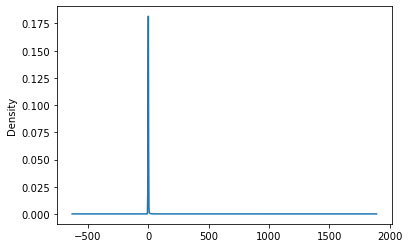

In [5]:
name_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than or equal to 5.
replace_application = list(name_counts[name_counts <= 3].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check if binning was successful
application_df.NAME.value_counts()

Other                                                     19515
PARENT BOOSTER USA INC                                     1260
TOPS CLUB INC                                               765
UNITED STATES BOWLING CONGRESS INC                          700
WASHINGTON STATE UNIVERSITY                                 492
                                                          ...  
TENNESSEE MUSIC EDUCATION ASSOCIATION                         4
NATIONAL SORORITY OF PHI DELTA KAPPA INC                      4
SUNRISE 2000 INC                                              4
DEPARTMENT OF OKLAHOMA LADIES AUXILIARY TO THE VFW INC        4
LOUISIANA 4-H FOUNDTION                                       4
Name: NAME, Length: 475, dtype: int64

In [9]:
# APPLICATION_TYPE counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()


In [10]:
# Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check if binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
class_counts = application_df.CLASSIFICATION.value_counts()

In [ ]:
# Determine which values to replace if counts are less than 1000
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

In [19]:
# Generate categorical variable lists
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [20]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_cat)
encode_df.head()

,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALASKA PTA,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(app_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               58300     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 61,651
Trainable params: 61,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("challenge_checkpoints/",exist_ok=True)
checkpoint_path = "challenge_checkpoints/weights.{epoch:02d}.hdf5"

In [29]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=1000)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5754 - accuracy: 0.7165
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4381 - accuracy: 0.8024
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4277 - accuracy: 0.8046
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.4263 - accuracy: 0.8014: 0s - loss: 0.4267 
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4140 - accuracy: 0.8044
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4108 - accuracy: 0.8067: 0s - loss: 0.4102 - ac
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4174 - accuracy: 0.8034
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4139 - accuracy: 0.8026
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4104 - accuracy: 0.8075
Epoch 10/100
804/804 [=========================

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")